In [1]:
import numpy as np
import torch

seed = 42 #424
np.random.seed(seed)
torch.manual_seed(seed)
#NOTE! This only works for non cudnn. gpu needs
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

from helpers import showcase_code

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import gc

In [2]:
# for working with external files, otherwise kernels needs to be restarted each time
%load_ext autoreload
%autoreload 2


# Measures

## NLPD

## Error

## cobeau
 
## coverage ?

## distance from 'optimally informed Tsomething' (DOIT)


# experiment

## setup



### toy problem
parameters were obtained via non-exhaustive gridsearch, since the performance on the error is not the most important metric, the other metrics were not optimized for.

#### 100 times per model:


for i in range experiment:
  seed = f(i)
  model = new_model(seed=f(i))
  model.fit(X_train,y_train)
  outcomes = model.get_uncertainty(X_test,y_test)
  measures.append(get_measures(outcomes))
  
stats = mean/std(measures)
  
#### comparisson models:

##### optimal model

##### mean/std model

### kaggle problem


#### 100 times per model:


for i in range experiment:
  seed = f(i)
  model = new_model(seed=f(i))
  model.fit(X_train,y_train)
  outcomes = model.get_uncertainty(X_test,y_test)
  measures.append(get_measures(outcomes))
  
stats = mean/std(measures)

In [3]:
showcase_code('measures.py',showcase=True)

# Toy Problem

In [4]:
from data_loaders import get_X_y, generate_y
from measures import compute_cobeau, compute_nlpd, compute_error

from helpers import plot_uncertainty

In [5]:
toy = False
non_linearity =torch.nn.LeakyReLU# torch.nn.Tanh

num_epochs = 300
if toy:
    num_epochs = 2000#2000
    non_linearity = torch.nn.ReLU# torch.nn.Tanh#torch.nn.LeakyReLU

num_experiments = 100#100


In [6]:
from nn_models.models import SaverModel, BobstrapEnsemble, DropoutModel
from nn_models.base_ensemble import VanillaEnsemble
from nn_models.ensembles import BootstrapEnsemble, ShuffleEnsemble
import os
# Done toy Bob, SaverModel, DropoutModel, BootstrapEnsemble, ShuffleEnsemble, VanillaEnsemble


iters = 100
l2 = 1
n_std = 4

In [7]:
from experimentation import Experimentator

In [8]:
# import cPickle as pickle
import pickle

In [9]:
#os.makedirs(os.getcwd() + '\\' + save_file )

In [10]:
len("<class 'torch.nn.modules.activation.")

36

In [11]:
f'{non_linearity}'[36:-2]

'LeakyReLU'

<class 'nn_models.ensembles.BootstrapEnsemble'>
False
saving file
Creation of the directory pickles\LeakyReLU\BootstrapEnsemble_toy_False_100.pkl failed
<class 'nn_models.ensembles.ShuffleEnsemble'>
False
saving file
Creation of the directory pickles\LeakyReLU\ShuffleEnsemble_toy_False_100.pkl failed


C:\Users\thoma\Miniconda3\envs\pytorch\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\thoma\Miniconda3\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


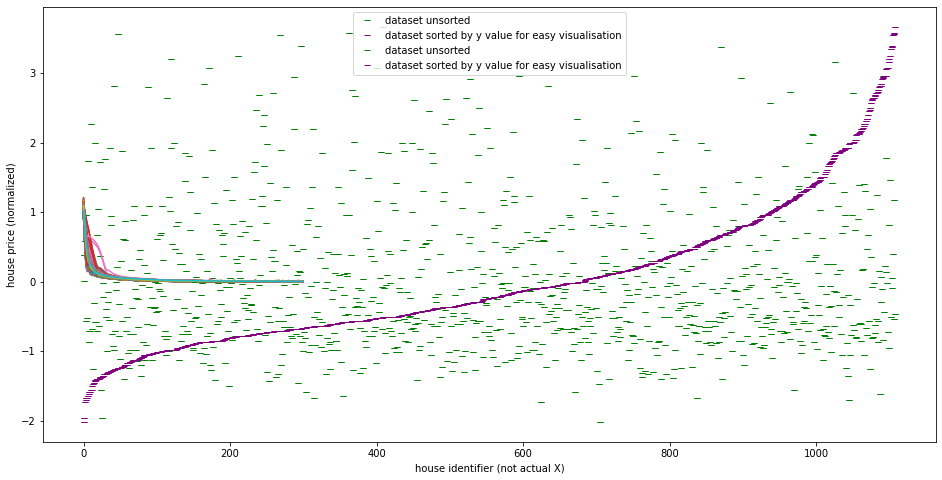

In [12]:
models =[ BootstrapEnsemble, ShuffleEnsemble, ] #SaverModel, BobstrapEnsemble, DropoutModel, VanillaEnsemble,

#models = [VanillaEnsemble]


for model in models:
    exp = Experimentator(num_experiments,num_epochs,model,toy,seed=seed,generator_function = generate_y, non_linearity=non_linearity ) #torch.nn.Tanh
    exp.run_experiment()
    print('saving file')

    save_path = f"pickles\\{exp.non_linearity_name}\\"
    save_file = save_path + f'{exp.model_name}_toy_{toy}_{num_experiments}.pkl'
    
    
    try:
        os.makedirs(os.getcwd() + '\\' + save_path )
    except OSError:
        print ("Creation of the directory %s failed" % save_file)
    else:
        print ("Successfully created the directory %s " % save_file)
    
    
    pickle.dump( exp, open( save_file , "wb" ) )
    
    del exp
    
    gc.collect()

In [13]:
del exp
gc.collect()

NameError: name 'exp' is not defined

In [ ]:
# models =[SaverModel, BobstrapEnsemble, DropoutModel, VanillaEnsemble, BootstrapEnsemble, ShuffleEnsemble]

# for model in models:
#     exp = Experimentator(num_experiments,num_epochs,model,toy,seed=seed,generator_function = generate_y)
#     exp.run_experiment()
#     print('saving file')

#     save_file = f"pickles\\{exp.model_name}_toy_{toy}_{num_experiments}.pkl"
#     pickle.dump( exp, open( save_file, "wb" ) )
    
#     #del exp
    
#     #gc.collect()

In [ ]:
exp = pickle.loads( open( save_file, "rb" ) )

In [ ]:
    save_file = f"pickles\\{exp.model_name}_toy_{toy}_{num_experiments}.pkl"
    pickle.dump( exp, open( save_file, "wb" ) )

In [ ]:
exp = pickle.load( open( save_file, "rb" ) )

In [ ]:
exp

In [ ]:
plt.plot(exp.stats_dict['training']['losses'])